***
##### This module defines a Support Vector Regression (SVR) model, whose kernel function is radial basis fucntion. The main task is to train a SVR model to do stock price forecasting. 

##### This module split the original data set into training set and test set. After training the SVR model with the training set, this module computes the root mean square error (RMSE) and the coefficient of determination (R<sup>2</sup>) in the test set. In order to improve the data visualization, this module also plots the actual stock price and the predicted stock price on the same figure.
 
##### Authored by Menghong Huang and Zhaosheng Li.
***

## Import some python libraries

In [1]:
%matplotlib inline
import numpy as np
from sklearn.svm import SVR     # Support Vector Regression
from sklearn.linear_model import LinearRegression   # Linear regression model
import matplotlib.pyplot as plt 
import pandas as pd             # For loading the data into dataframe

# For calculating RMSE, the usage refers to https://stackoverflow.com/a/18623635 
from sklearn.metrics import mean_squared_error
from math import sqrt

# For calculating the coefficient of determination (R^2), 
# The usage refers to https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import r2_score

import matplotlib.dates as mdates # For converting the 'date' into numerical variable
import joblib  # For saving and loading model

## Load data into dataframe

In [2]:
df = pd.read_csv("data/GME_stock.csv")

#### Take a look at the first and last five entries of the dataframe

In [3]:
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2002-02-13,9.625,10.060,9.525,10.050,19054000,6.766666
1,2002-02-14,10.175,10.195,9.925,10.000,2755400,6.733003
2,2002-02-15,10.000,10.025,9.850,9.950,2097400,6.699336
3,2002-02-19,9.900,9.900,9.375,9.550,1852600,6.430017
4,2002-02-20,9.600,9.875,9.525,9.875,1723200,6.648838


In [4]:
df.tail()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
4768,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300,65.010002
4769,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000,76.790001
4770,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000,147.979996
4771,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700,347.510010
4772,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800,193.600006


In [5]:
df.reset_index(inplace = True)
df.set_index("date", inplace = True)
df = df[['close_price']]

In [6]:
forecasting_time_step = 1

In [7]:
df['target_close_price'] = df['close_price'].shift(-forecasting_time_step)

In [8]:
df.head()

,close_price,target_close_price
date,,
2002-02-13,10.050,10.000
2002-02-14,10.000,9.950
2002-02-15,9.950,9.550
2002-02-19,9.550,9.875
2002-02-20,9.875,9.850


In [9]:
df.tail()

,close_price,target_close_price
date,,
2021-01-22,65.010002,76.790001
2021-01-25,76.790001,147.979996
2021-01-26,147.979996,347.510010
2021-01-27,347.510010,193.600006
2021-01-28,193.600006,NaN


In [10]:
df = df[:-forecasting_time_step]

In [11]:
df.tail()

,close_price,target_close_price
date,,
2021-01-21,43.029999,65.010002
2021-01-22,65.010002,76.790001
2021-01-25,76.790001,147.979996
2021-01-26,147.979996,347.510010
2021-01-27,347.510010,193.600006


In [12]:
dates_training = pd.to_datetime(df.index[:3773])
dates_test = pd.to_datetime(df.index[3773:])

In [13]:
X = np.array(df['close_price']).reshape(-1, 1)
Y = np.array(df['target_close_price'])

In [14]:
x_train, x_test, y_train, y_test = X[:3773], X[3773:], Y[:3773], Y[3773:]

In [15]:
SVR_RBF = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)

In [16]:
SVR_RBF.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [17]:
LR = LinearRegression()

In [18]:
LR.fit(x_train, y_train)

LinearRegression()

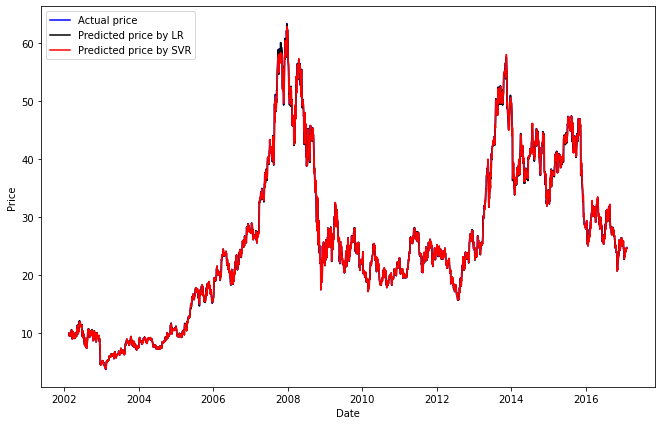

In [19]:
plt.figure(figsize = (11,7))
plt.plot(dates_training, y_train, color= 'blue', label= 'Actual price')
plt.plot(dates_training, LR.predict(x_train), color= 'black', label= 'Predicted price by LR') 
plt.plot(dates_training, SVR_RBF.predict(x_train), color= 'red', label= 'Predicted price by SVR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

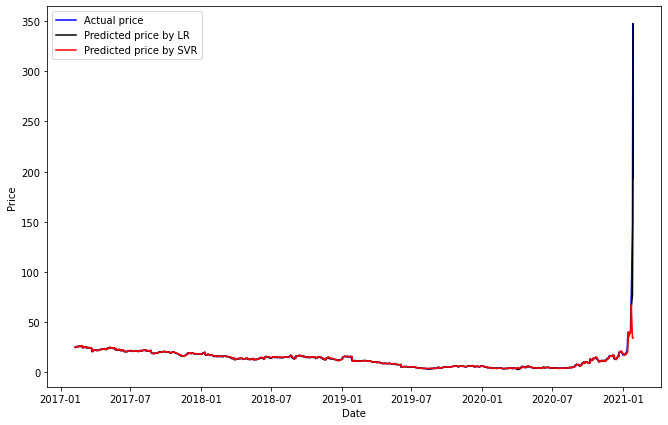

In [20]:
plt.figure(figsize = (11,7))
plt.plot(dates_test, y_test, color= 'blue', label= 'Actual price')
plt.plot(dates_test, LR.predict(x_test), color= 'black', label= 'Predicted price by LR') 
plt.plot(dates_test, SVR_RBF.predict(x_test), color= 'red', label= 'Predicted price by SVR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
SVR_RBF.score(x_test[:-10], y_test[:-10])

0.9901160196338264

In [22]:
LR.score(x_test[:-10], y_test[:-10])

0.990700014494065

In [23]:
print(f'The root mean square error (RMSE) for SVR model is {sqrt(mean_squared_error(y_test[:-10], SVR_RBF.predict(x_test[:-10])))}')

The root mean square error (RMSE) for SVR model is 0.647434411410885


In [24]:
print(f'The root mean square error (RMSE) for SVR model is {sqrt(mean_squared_error(y_test[:-10], LR.predict(x_test[:-10])))}')

The root mean square error (RMSE) for SVR model is 0.6280163890262653


In [25]:
print(f'The root mean square error (RMSE) for SVR model is {sqrt(mean_squared_error(y_test, SVR_RBF.predict(x_test)))}')

The root mean square error (RMSE) for SVR model is 11.740369786317919


In [26]:
SVR_RBF.score(x_test, y_test)

0.35962474543117084

In [27]:
print(f'The root mean square error (RMSE) for SVR model is {sqrt(mean_squared_error(y_test, LR.predict(x_test)))}')

The root mean square error (RMSE) for SVR model is 8.348382867572662


In [28]:
LR.score(x_test, y_test)

0.6762008490419649